In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
data=pd.read_excel('训练集.xlsx',0)
data=data.iloc[:,1:]
#打乱
from sklearn.utils import shuffle
data = shuffle(data)
data.head()
#归一化
data=(data-data.min())/(data.max()-data.min())
data.head()
cut=len(data)//10
x_train,y_train,x_val,y_val=data.iloc[:-cut,data.columns != '信誉评级分数'],data.iloc[:-cut,data.columns == '信誉评级分数'],data.iloc[-cut:,data.columns != '信誉评级分数'],data.iloc[-cut:,data.columns == '信誉评级分数']
x_train,y_train,x_val,y_val=x_train.values,y_train.values,x_val.values,y_val.values
print(x_train.shape,y_train.shape,x_val.shape,y_val.shape)


(111, 9) (111, 1) (12, 9) (12, 1)


In [10]:
#以下函数均为对模型进行检验所用到的 精简代码的作用
def output(X_train,y_train,X_test,y_test):
    #在训练集上的拟合结果
    y_train_predict=model.predict(X_train)
    #展示在训练集上的表现 
    draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
    draw.iloc[:,0].plot(figsize=(12,6))
    draw.iloc[:,1].plot(figsize=(12,6))
    plt.legend(('real', 'predict'),fontsize='15')
    plt.title("Train Data",fontsize='30') #添加标题
    plt.show()
    #在验证集上的预测
    y_test_predict=model.predict(X_test)
    #展示在验证集上的表现 
    draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
    draw.iloc[:,0].plot(figsize=(12,6))
    draw.iloc[:,1].plot(figsize=(12,6))
    plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
    plt.title("Validation Data",fontsize='30') #添加标题
    plt.show()
    #输出结果
    print('训练集上的MAE/MSE')
    print(mean_absolute_error(y_train_predict, y_train))
    print(mean_squared_error(y_train_predict, y_train) )
    print('验证集上的MAE/MSE')
    print(mean_absolute_error(y_test_predict, y_test))
    print(mean_squared_error(y_test_predict, y_test) )

E:\anoconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\anoconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


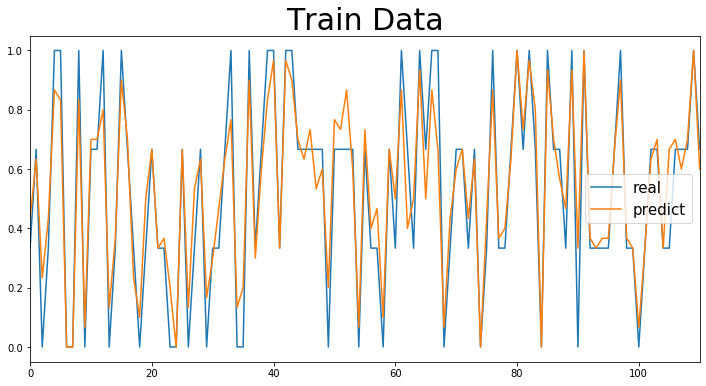

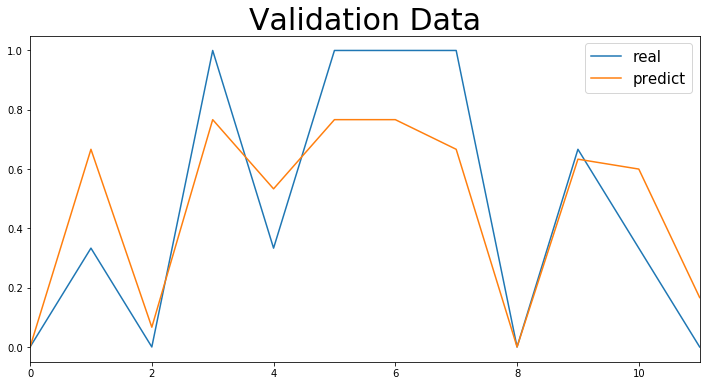

训练集上的MAE/MSE
0.08498498498498498
0.013003003003003001
验证集上的MAE/MSE
0.17499999999999996
0.04416666666666667


In [11]:
# 建立随机森林模型 预测
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model = rf.fit(x_train, y_train) 
output(x_train, y_train,x_val,y_val)

In [12]:
data=pd.read_excel('测试集.xlsx',0)
data=data.iloc[:,1:]
#打乱
#from sklearn.utils import shuffle
#data = shuffle(data)
data.head()
#归一化
data=(data-data.min())/(data.max()-data.min())
data.head()
test_x=data.values

In [13]:
# 建立随机森林模型 预测
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model = rf.fit(x_train, y_train) 
predict=model.predict(test_x)
feature_important=model.feature_importances_
print('预测结果',predict)
print('特征重要程度',feature_important)

预测结果 [0.8        0.8        0.6        0.53333333 0.8        0.76666667
 0.8        0.83333333 0.86666667 0.66666667 0.66666667 0.73333333
 0.66666667 0.73333333 0.73333333 0.86666667 0.66666667 0.76666667
 0.76666667 0.8        0.66666667 0.83333333 0.76666667 0.86666667
 0.8        0.66666667 0.73333333 0.76666667 0.73333333 0.73333333
 0.8        0.76666667 0.56666667 0.73333333 0.76666667 0.9
 0.8        0.63333333 0.86666667 0.7        0.83333333 0.9
 0.63333333 0.86666667 0.76666667 0.9        0.8        0.83333333
 0.83333333 0.7        0.83333333 0.86666667 0.76666667 0.83333333
 0.73333333 0.8        0.9        0.83333333 0.76666667 0.9
 0.8        0.86666667 0.76666667 0.83333333 0.83333333 0.8
 0.73333333 0.73333333 0.86666667 0.73333333 0.73333333 0.8
 0.73333333 0.86666667 0.73333333 0.73333333 0.7        0.8
 0.8        0.73333333 0.83333333 0.8        0.9        0.93333333
 0.6        0.9        0.73333333 0.73333333 0.6        0.86666667
 0.66666667 0.8        0.9      

E:\anoconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\anoconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [14]:
from sklearn.tree import DecisionTreeRegressor
rf=DecisionTreeRegressor()
model = rf.fit(x_train, y_train) 
predict=model.predict(test_x)
feature_important=model.feature_importances_
print('预测结果',predict)
print('特征重要程度',feature_important)

预测结果 [1.         1.         1.         1.         0.66666667 1.
 0.66666667 1.         1.         1.         0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 1.         0.66666667 1.
 0.66666667 1.         0.66666667 1.         0.66666667 1.
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 1.
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 1.
 1.         1.         1.         0.66666667 1.         1.
 0.66666667 1.         0.66666667 1.         0.66666667 1.
 0.66666667 0.66666667 0.66666667 1.         1.         0.66666667
 0.66666667 0.66666667 1.         0.66666667 0.66666667 0.66666667
 0.66666667 1.         0.66666667 0.66666667 0.66666667 0.66666667
 1.         0.66666667 1.         1.         0.66666667 1.
 0.66666667 1.         0.66666667 1.         0.66666667 0.66666667
 0.66666667 0.66666667 1.         0.66666667 0.66666667 1.
 0.66666667 1.         0.66666667 0.66666667 1.         0.66666667
 1.         0.66666667 0.66666667 1.         1.         1.
 1.

In [15]:
data=pd.read_excel('测试集.xlsx',0)
data=data.iloc[:,1:]
data.columns

Index(['进项金额', '进项税额', '进项单位个数', '发票作废率', '销项金额', '销项税额', '进销单位总和', '负数率',
       '总利润'],
      dtype='object')

In [16]:
from sklearn.tree.export import export_text
r = export_text(model, feature_names=['进项金额', '进项税额', '进项单位个数', '发票作废率', '销项金额', '销项税额', '进销单位总和', '负数率',
       '总利润'])
print(r)

|--- 销项金额 <= 0.00
|   |--- 进销单位总和 <= 0.01
|   |   |--- 进项金额 <= 0.00
|   |   |   |--- 进销单位总和 <= 0.00
|   |   |   |   |--- value: [0.00]
|   |   |   |--- 进销单位总和 >  0.00
|   |   |   |   |--- value: [0.33]
|   |   |--- 进项金额 >  0.00
|   |   |   |--- value: [0.00]
|   |--- 进销单位总和 >  0.01
|   |   |--- 进项税额 <= 0.00
|   |   |   |--- 发票作废率 <= 0.03
|   |   |   |   |--- value: [0.33]
|   |   |   |--- 发票作废率 >  0.03
|   |   |   |   |--- value: [0.67]
|   |   |--- 进项税额 >  0.00
|   |   |   |--- value: [0.00]
|--- 销项金额 >  0.00
|   |--- 销项税额 <= 0.01
|   |   |--- 进销单位总和 <= 0.00
|   |   |   |--- 进项金额 <= 0.00
|   |   |   |   |--- 进项税额 <= 0.00
|   |   |   |   |   |--- 进项税额 <= 0.00
|   |   |   |   |   |   |--- 销项金额 <= 0.00
|   |   |   |   |   |   |   |--- 销项税额 <= 0.00
|   |   |   |   |   |   |   |   |--- value: [0.33]
|   |   |   |   |   |   |   |--- 销项税额 >  0.00
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- 销项金额 >  0.00
|   |   |   |   |   |   |   |--- value: [0.33]
|   |  

In [17]:
from sklearn import tree
#5.将生成的决策树保存
with open("jueceshu.dot", 'w') as f:
    f = tree.export_graphviz(model, out_file = f)